In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io

## Principle Component Analysis

Here we will implement the PCA manually and then we will test our function on two different datasets.

In [0]:
def perform_pca(X):
  '''Apply Principle Component Analysis: extract the projected data as well as 
  the eigenvectors of all possible principle components -no specific K number
  of components'''

  # Standardize the Data: perform mean normalization
  X = X - np.mean(X, axis=0)
  X = X / np.std(X, axis=0)

  # Covariance Matrix
  sigma = (1/len(X)) * np.dot(X.transpose(), X) # same as: np.cov(X.transpose())

  # Extract eigenvalues and eigenvectors (eigen-decomposition)
  u, s, _ = np.linalg.svd(sigma) # same as: s, u = np.linalg.eig(sigma)

  # Project X on each principal component (eigenvector)
  Z = np.dot(X, u)
  
  # Plot the data and the identified principal components (if visualizable)
  try:
    plt.plot(X[:,0], X[:,1], 'ro')
      
    point_1 = np.mean(X, axis=0)
    for i in range(0, u.shape[1]):
      point_2 = point_1 + 1.5 * s[i] * u[:,i]
      plt.plot([point_1[0], point_2[0]], [point_1[1], point_2[1]], 'k-')

    # plt.savefig('Data_PCA.png')
    # print('Data_PCA.png saved in working directory.')
    plt.show()
    plt.close()
    
  except:
    print("Can't visualize the principle component vectors.",
          "The dataset has more than two dimensions.\n")     
  
  return u, Z

Another way to easily apply PCA is to use scikit-learn's built-in PCA() function.
Here's a snippet that does exactly what our manual function aims to do:

```
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data
X =  pd.read_excel('EPL.xlsx', index_col=0)

# Include only the relevant 8 features - separate y
winner = X.iloc[:,9].values
X = X.iloc[:, 1:9]

# Standardizing features
X = StandardScaler().fit_transform(X)

# Perform PCA without specifying a number of components
Z = PCA().fit_transform(X)
Z_df = pd.DataFrame(data = Z)
```

Quick note: normally we would be interested in the first k vectors of the u matrix (eigenvectors), which can be done by using `PCA(n_components=k)`. This is the whole point of using PCA in the first place: dimensionality reduction. But for the purpose of this assignment, we would like to visualize the projected data on every component of the u matrix, so we would use `PCA()` in this case.

Quick note 2: PCA is effected by scale so we need to scale the features in our data before applying PCA. We would use scikit-learn's StandardScaler to help us standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

Quick note 3: after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the main dimensions of variation.

## Sample dataset 1

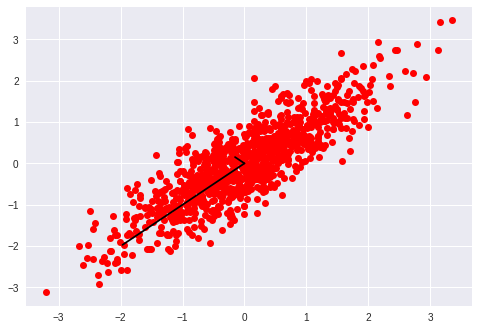

In [3]:
# Load data
X = pd.read_csv('Data.txt', sep=" ", header=None).values

# Apply manual PCA: get eigenvectors and Z matrix
u, Z = perform_pca(X)

## Sample dataset 2: Premier League Results - Season 2017/2018

Above we can see the two principle component vectors are visualized in black.

Now let's try another dataset: the outcome of all games in the English Premier League of the season 2017/2018 that ended by the win of one of the two competing teams.  The attributes given in the file for each game
are as follows:

1. Home Team
2. Away Team
3. HS: Home Team Shots
4. AS: Away Team Shots
5. HST: Home Team Shots on Target
6. AST: Away Team Shots on Target
7. HF: Home Team Fouls Committed
8. AF: Away Team Fouls Committed
9. HC: Home Team Corners
10. AC: Away Team Corners
11. Winner: Full-time Result

The first two attributes are given for reference only. The Winner field represents who won the game (H if the home team won and A if the away team won). Therefore, this data has 8 dimensions excluding the teams names and the Winner field.

What we would like to do is visualize the home and away results of the projected data for every principle component.
Also, in order to evaluate how each principal component provides better representation of the data: for each principal component, we will compute the difference between the mean of projections of the data points representing when the home team won and that representing when the away team won. Then we will plot the distance computed versus the principal component index.

Can't visualize the principle component vectors. The dataset has more than two dimensions.



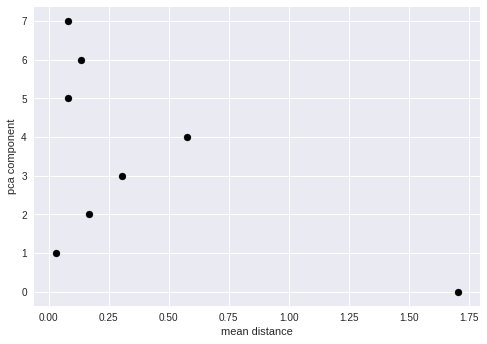

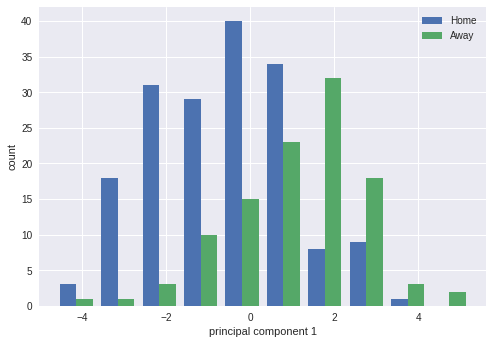

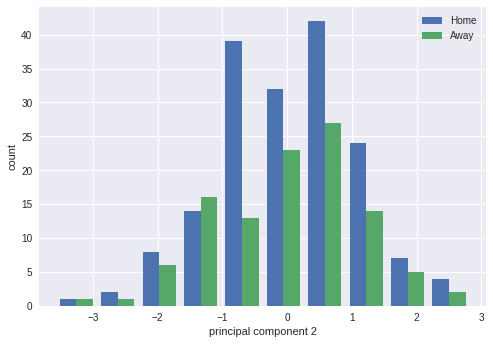

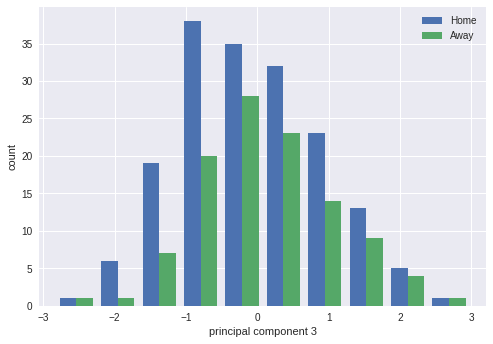

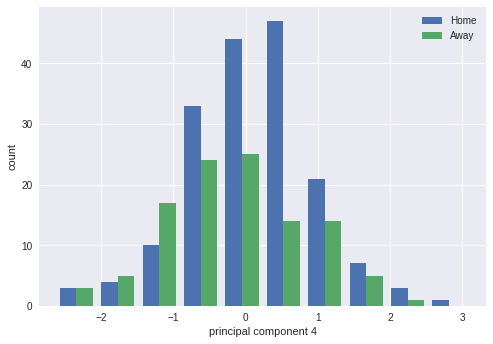

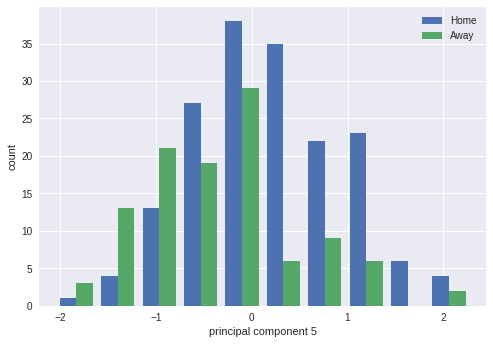

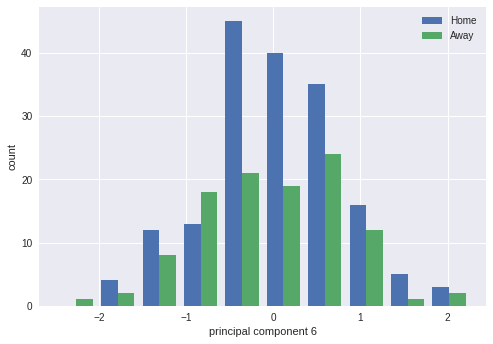

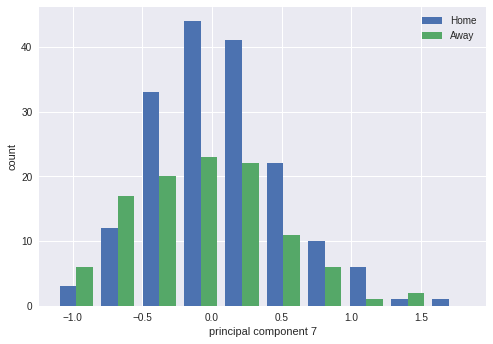

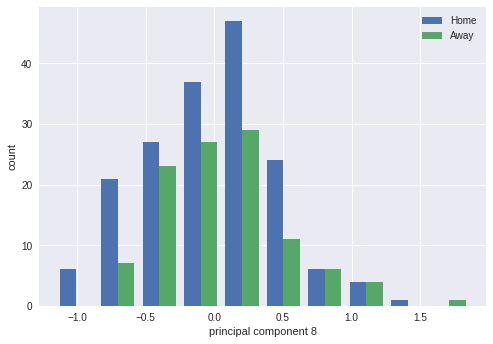

In [4]:
# Load data
X =  pd.read_excel('EPL.xlsx', index_col=0)

# Include only the relevant 8 features - separate y
winner = X.iloc[:,9].values
X = X.iloc[:, 1:9]

# Apply manual PCA: get eigenvectors and Z matrix
u, Z = perform_pca(X)

# Create a Z dataframe and concat y
Z_df = pd.DataFrame(Z)
Z_df['Winner'] = winner

# Separate the records according to the result y
home_wins_df = Z_df[Z_df['Winner'] == 'H']
away_wins_df = Z_df[Z_df['Winner'] == 'A']

# Plot the distance against the PC index
home_mean = np.mean(home_wins_df, axis=0)
away_mean = np.mean(away_wins_df, axis=0)
mean_distance = abs(home_mean - away_mean)
pca_index = np.arange(0,8,1)

plt.scatter(mean_distance, pca_index, color='black')
plt.xlabel('mean distance')
plt.ylabel('pca component')
# plt.savefig('Distance.png')
plt.show()
plt.close()

# Plot the projected data on each of the PC
for i in pca_index:

  plt.hist([home_wins_df.iloc[:,i].values, away_wins_df.iloc[:,i].values],
           bins=10, label=['Home', 'Away'])
  plt.legend(loc='upper right')
  plt.xlabel('principal component '+str(i+1))
  plt.ylabel('count')
  
  # Save plots as PNGs
  # plt.savefig('proj_pc'+str(i+1)+'.png')
  # print('proj_pc'+str(i+1)+'.png saved in working directory.')
  
  plt.show()
  plt.close()

See more about using PCA [here](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60).